In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#df = sns.load_dataset('iris
df = pd.read_csv('..\..\seaborn-data\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#sns.set(style="ticks")
#df = sns.load_dataset("iris")
#sns.pairplot(df, hue="species");
#sns.lmplot(x='sepal_length', y='sepal_width', data=df);

relplot()是我们经常使用的可视化统计关系的figure level function

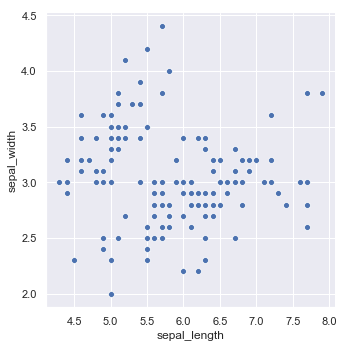

In [4]:
# 画出iris数据集的sepal_length和sepal_width散点图
sns.set(style='darkgrid')
sns.relplot(x='sepal_length', y='sepal_width', data=df);

如果数据的类别可以通过第三维区分，那么通过hue参数可以根据数据的不同类别描绘不同的颜色

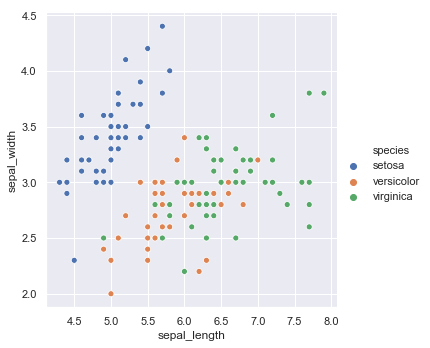

In [5]:
sns.set(style='darkgrid')
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=df);

通过hue和style参数描绘三种不同形状颜色的数据点

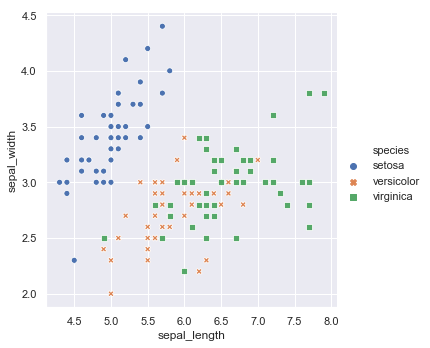

In [6]:
sns.set(style='darkgrid')
sns.relplot(x='sepal_length', y='sepal_width', hue='species', 
            style='species', data=df);

In [7]:
# 另一个数据集
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


也可以通过独立地改变每个点的hue和style来表示四个变量，但是注意这会使我们很难分辨，
因为眼睛对形状比颜色更不敏感

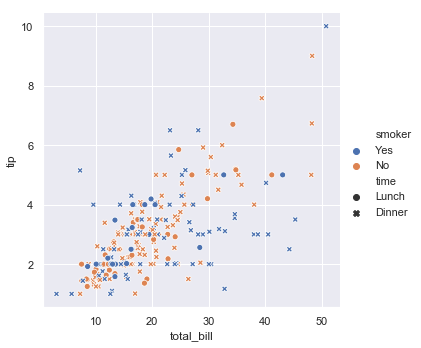

In [8]:
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=tips);

hue参数也可以设置为数值型的(例如float)

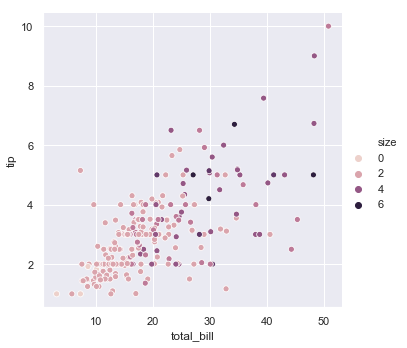

In [9]:
sns.relplot(x='total_bill', y='tip', hue='size', data=tips);

我们也可以通过size参数设置不同类别的数据点的大小

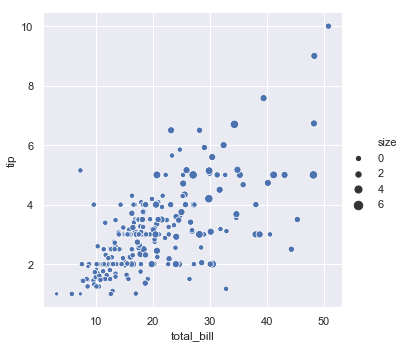

In [10]:
sns.relplot(x='total_bill', y='tip', size='size', data=tips);

设置sizes和size参数控制点的大小

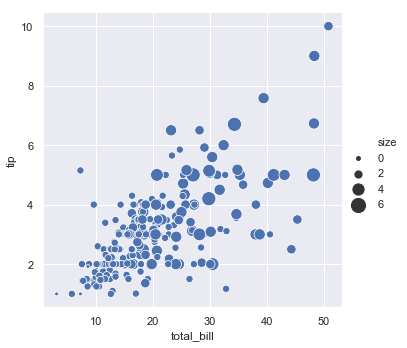

In [11]:
sns.relplot(x='total_bill', y='tip', size='size', sizes=(15, 200), data=tips);

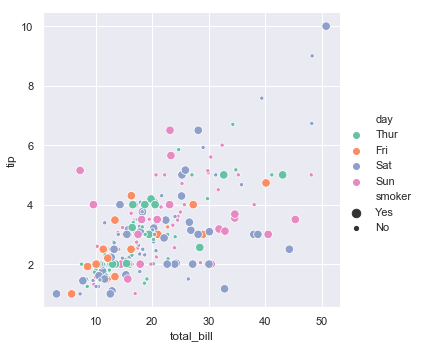

In [12]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.relplot(x="total_bill", y="tip",
                     hue="day", size="smoker",
                     palette="Set2",
                     data=tips);
# 也可以用ax = scatterplot()函数

## Emphasizing continuity with line plots

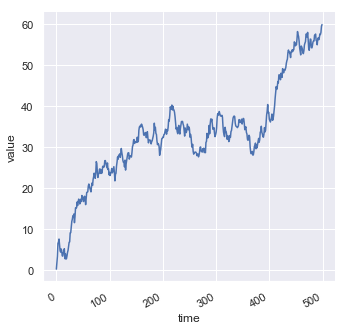

In [13]:
import numpy as np
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.fig.autofmt_xdate();

lineplot()默认是根据已排好序的x的值画图，可以通过设置sort=False来改变

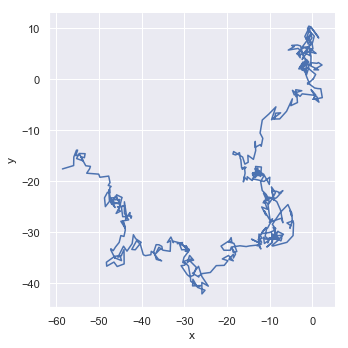

In [15]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=['x','y'])
sns.relplot(x='x', y='y', sort=False, kind='line', data=df);

## Aggregation and representing uncertainty

In [16]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


通过绘制平均值和围绕平均值的95%置信区间来聚集每个x值的多个测量

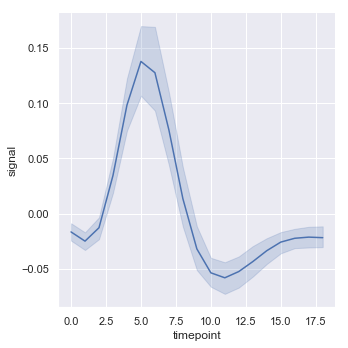

In [17]:
sns.relplot(x='timepoint', y='signal', kind='line', data=fmri);

通过设置ci参数禁止它

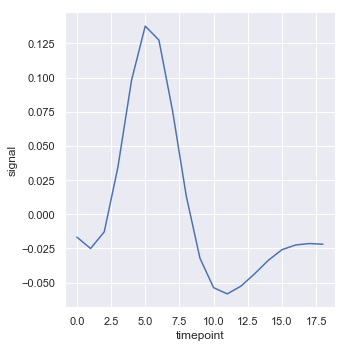

In [19]:
sns.relplot(x='timepoint', y='signal', ci=None, kind='line', data=fmri);

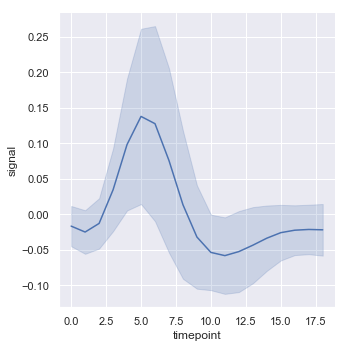

In [20]:
sns.relplot(x='timepoint', y='signal', kind='line', ci='sd', data=fmri);

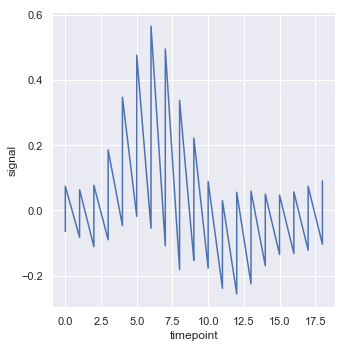

In [24]:
sns.relplot(x='timepoint', y='signal', estimator=None, kind='line', data=fmri);

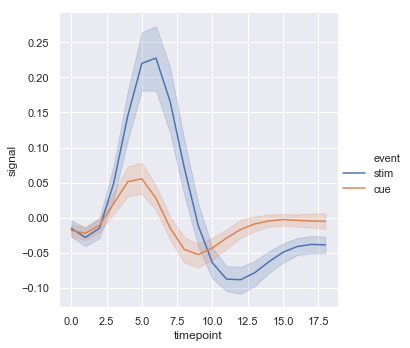

In [25]:
sns.relplot(x='timepoint', y='signal', hue='event', kind='line', data=fmri);

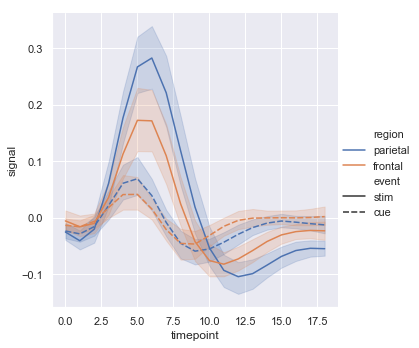

In [26]:
sns.relplot(x='timepoint', y='signal', hue='region', 
            style='event', kind='line', data=fmri);

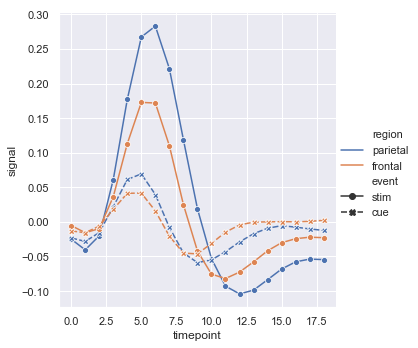

In [29]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event',ci=None,
            dashes=None, markers=True, kind='line', data=fmri);

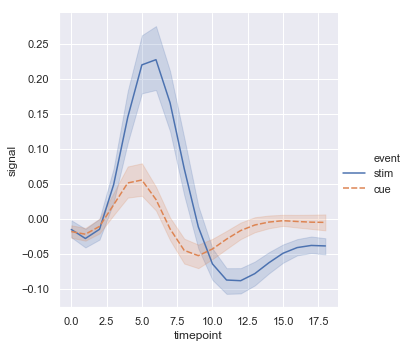

In [33]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event',
            kind='line', data=fmri);#ci=None,

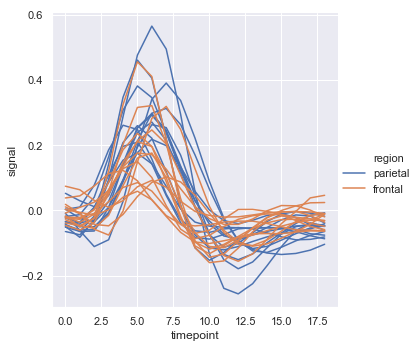

In [34]:
sns.relplot(x='timepoint', y='signal', hue='region',
            units='subject', estimator=None,
            kind='line', data=fmri.query("event == 'stim'"));

## Showing multiple relationships with facets

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


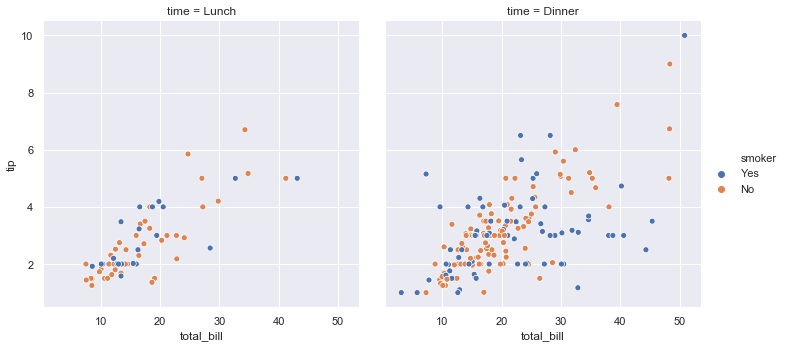

In [40]:
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips);

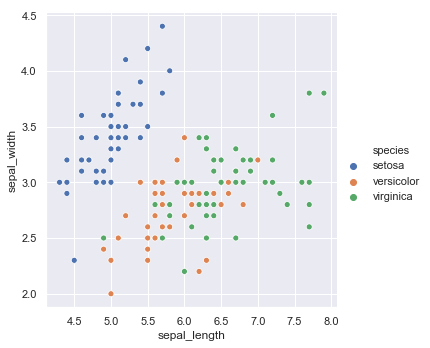

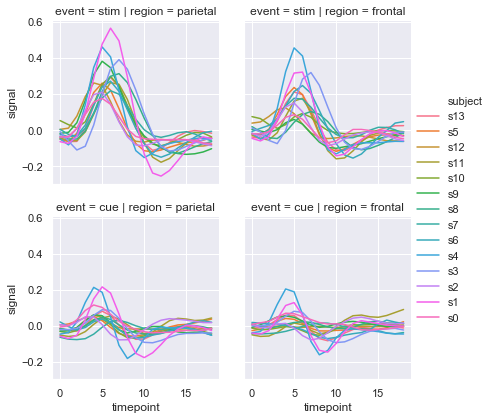

In [45]:
sns.relplot(x='timepoint', y='signal', hue='subject',
            col='region', row='event', height=3,
            kind='line', estimator=None, data=fmri);

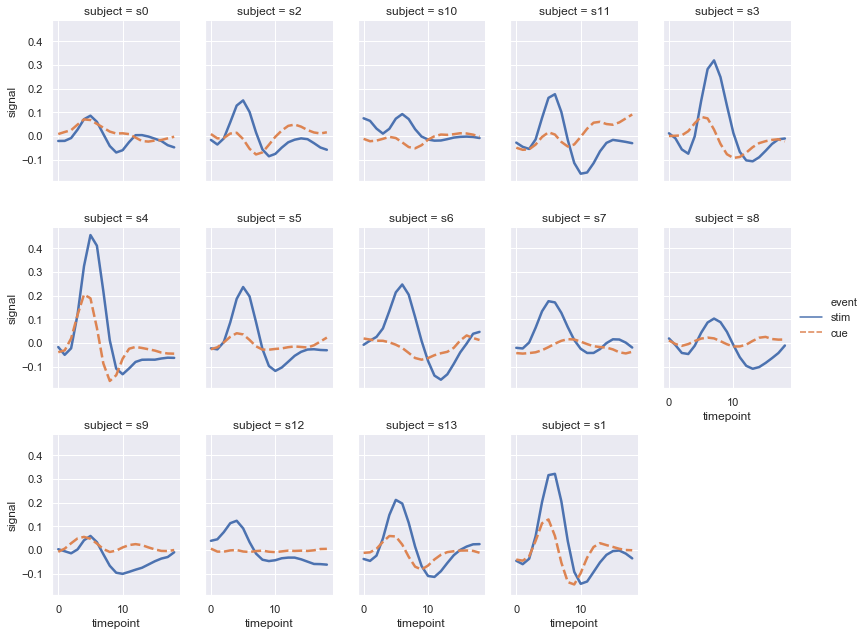

In [48]:
sns.relplot(x='timepoint', y='signal', hue='event',
            style='event',col='subject', col_wrap=5, 
            height=3, aspect=.75, linewidth=2.5,
            kind='line', data=fmri.query("region == 'frontal'"));